# sf work assignment.6.8.2016: Part II: model
Frank Wang

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import random
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error

# Funtions

In [2]:
import sklearn.metrics
import time
def evaluate_model(clf):
    """Scores a model using log loss with the created train and test sets."""
    start = time.time()
    clf.fit(x_train, y_train)
    print ("Train score:", sklearn.metrics.roc_auc_score(y_train, clf.predict(x_train)))
    print ("Test score:", sklearn.metrics.roc_auc_score(y_test, clf.predict(x_test)))
    print ("Total time:", time.time() - start)

In [3]:
def shuffle(df):
    index = list(df.index)
    random.shuffle(index)
    df = df.ix[index]
    df.reset_index()
    return df

In [4]:
def r_squared(y_pred,y_true):
    ymean=np.sum(y_true)/len(y_true)
    sstot=np.sum((y_true-ymean)**2)
    ssreg=np.sum((y_true-y_pred)**2) 
    result=1.0-ssreg/sstot
    return result

In [5]:
def rmse(y_pred,y_true):
    rmse= mean_squared_error(y_true, y_pred)**0.5
    return rmse

# train data

In [6]:
train_data=pd.read_csv('featured_Train.csv',sep=',')    
test_data=pd.read_csv('featured_Test.csv',sep=',')    
print len(train_data)
print len(test_data)
test_data['category_educational']=0

274350
80000


In [7]:
shuffle(train_data)
print 'done'

done


In [8]:
target=train_data.rate[train_data.dateLoan<4]
train_data_new=train_data.drop('rate',axis=1)[train_data.dateLoan<4]
print len(train_data_new)

230351


In [9]:
import sklearn
import sklearn.cross_validation
from sklearn.linear_model import LogisticRegression

np.random.seed(1333)
x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(train_data_new,target,test_size=1.0/3.0,\
                                                                             random_state=12)

### linear model

In [41]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(train_data_new,target)
y_train_out = ols.predict(x_train)
y_out = ols.predict(x_test)
#evaluate_model(ols)
print "R^2 for train set:",
print ols.score(x_train,y_train)
print "R^2 for test set:",
print ols.score(x_test,y_test)
# R^2 for train set: 0.988827381996
# R^2 for test set: 0.988746258488
#print r_squared(y_out,y_test)
print "RMSE of train",
print rmse(y_train_out,y_train)
print "RMSE of test",
print rmse(y_out,y_test)

R^2 for train set: 0.990481495049
R^2 for test set: 0.990575180255
RMSE of train 0.427405627998
RMSE of test 0.428459175107


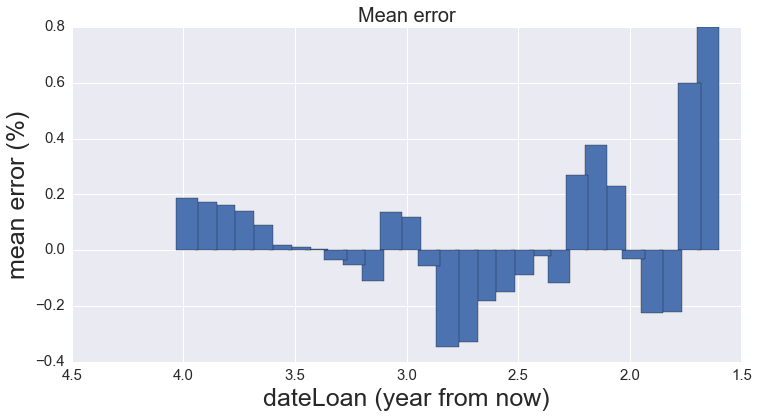

In [51]:
test_all=1.0*train_data_new
y_linear_all=ols.predict(train_data_new)
test_all['rmse']=y_train_out = y_linear_all-target
StateGroup=test_all.groupby(['dateLoan']).mean()
my_xticks = StateGroup.index
x= np.arange(len(my_xticks))
x2=x+0.5
fig=plt.figure()
plt.bar(StateGroup['rmse'].keys(),StateGroup['rmse'].values,0.1)
plt.gca().invert_xaxis()
#plt.xticks(x, my_xticks,fontsize = 15,rotation='vertical')
#plt.xticks(x2, my_xticks,fontsize = 8,rotation='horizontal')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('dateLoan (year from now)',fontsize=25)
plt.ylabel('mean error (%)',fontsize=25)
fig.set_size_inches(12,6) 
plt.title('Mean error',fontsize=20)
dump=['dateLoan','rmse']
temp=test_all[dump]
temp.to_csv('test_rmse.csv',sep=' ')

(array([      0.,   50000.,  100000.,  150000.,  200000.,  250000.,  300000.]),
 <a list of 7 Text xticklabel objects>)

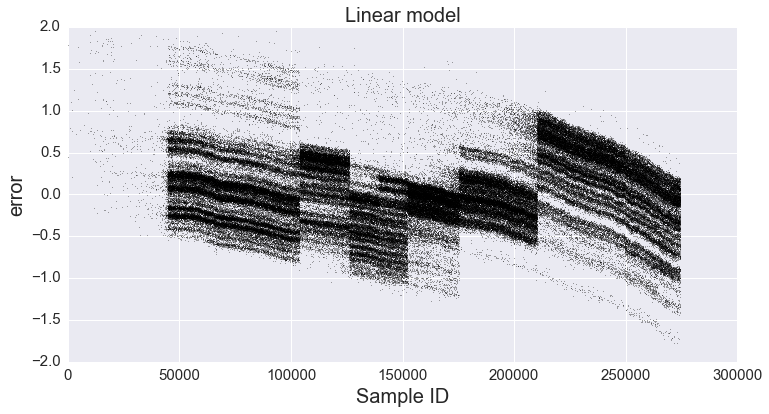

In [70]:
fig=plt.figure()
plt.plot(y_linear_all-target,'k.',markersize=1)
plt.ylim([-2,2])
fig.set_size_inches(12,6) 
plt.xlabel('Sample ID',fontsize=20)
plt.ylabel('error',fontsize=20)
plt.title('Linear model',fontsize=20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

In [12]:
elastic = linear_model.ElasticNet(l1_ratio =0.5,normalize=True)
elastic.set_params(alpha = 1.0e-7)
elastic.fit(x_train,y_train)
y_pred_test_ela = elastic.predict(x_test)
y_pred_train_ela = elastic.predict(x_train)
#evaluate_model(ols)
print "R^2 for train set:",
print elastic.score(x_train,y_train)
print "R^2 for test set:",
print elastic.score(x_test,y_test)
#print r_squared(y_out,y_test)
print "RMSE of train",
print rmse(y_pred_train_ela,y_train)
print "RMSE of test",
print rmse(y_pred_test_ela,y_test)

R^2 for train set: 0.990352997008
R^2 for test set: 0.990452529669
RMSE of train 0.430280904723
RMSE of test 0.431238056054


## Gradient Booster regression

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
import time
gbr = GradientBoostingRegressor()

In [14]:
#gbr_best = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2,max_depth=3)
start = time.time()
gbr_best=GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.15, loss='ls',
             max_depth=6, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=300,
             presort='auto', random_state=None, subsample=0.9, verbose=0,
             warm_start=False)
gbr_best.fit(train_data_new,target)
pred_G = gbr_best.predict(x_test)
print gbr_best.score(x_test,y_test)
print gbr_best.score(x_train,y_train)
print "Total time:", time.time() - start

0.999067550715
0.998945845708
Total time: 2498.92599988


In [16]:
y_tr_gbr=gbr_best.predict(x_train)
y_te_gbr=gbr_best.predict(x_test)
y_all_gbr=gbr_best.predict(train_data_new)
print "RMSE of train",
print rmse(y_tr_gbr,y_train)
print "RMSE of test",
print rmse(y_te_gbr,y_test)
print "RMSE of whole data",
print rmse(y_all_gbr,target)

RMSE of train 0.142235484749
RMSE of test 0.134767611411
RMSE of whole data 0.1397905175


In [17]:
from sklearn.externals import joblib
joblib.dump(gbr_best, 'gbm_best_final.pkl') 
y_test_gbr_out=gbr_best.predict(test_data)
with open('FrankWang_GBM.csv','a') as f:
    for (i,z) in enumerate(y_test_gbr_out):
        f.write('{}%'.format(z))
        f.write('\n')
f.close()

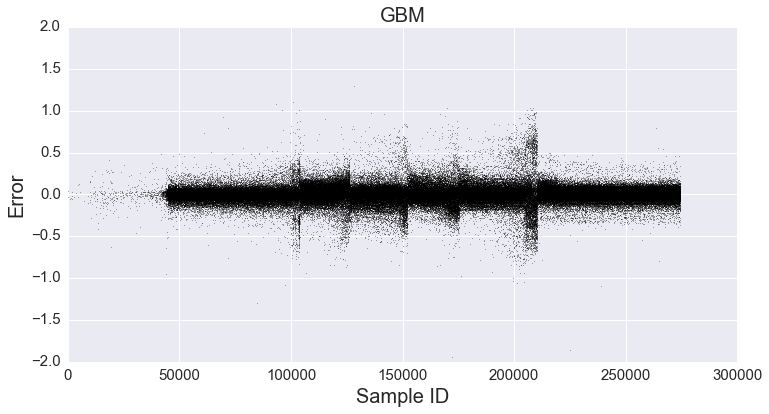

In [69]:
fig=plt.figure()
plt.plot(y_all_gbr-target,'k.',markersize=1)
plt.ylim([-2,2])
plt.xlabel('Sample ID',fontsize=20)
plt.ylabel('Error',fontsize=20)
plt.title('GBM',fontsize=20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
fig.set_size_inches(12,6) 


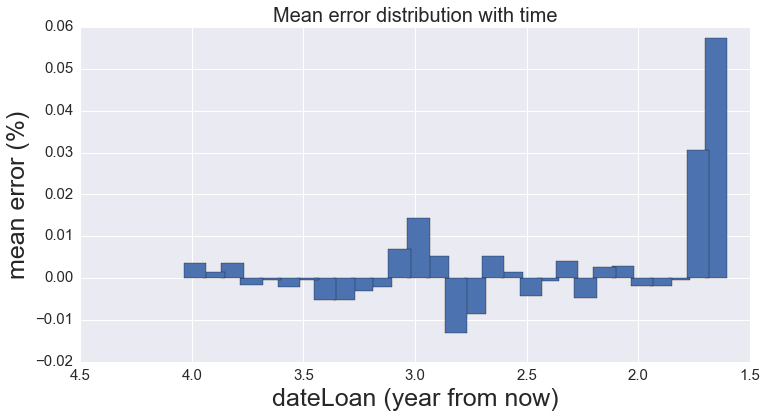

In [54]:
test_all=1.0*train_data_new
test_all['rmse']=y_all_gbr-target
StateGroup=test_all.groupby(['dateLoan']).mean()
my_xticks = StateGroup.index
x= np.arange(len(my_xticks))
x2=x+0.5
fig=plt.figure()
plt.bar(StateGroup['rmse'].keys(),StateGroup['rmse'].values,0.1)
plt.gca().invert_xaxis()
#plt.xticks(x, my_xticks,fontsize = 15,rotation='vertical')
#plt.xticks(x2, my_xticks,fontsize = 8,rotation='horizontal')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('dateLoan (year from now)',fontsize=25)
plt.ylabel('mean error (%)',fontsize=25)
fig.set_size_inches(12,6) 
plt.title('Mean error distribution with time',fontsize=20)
dump=['dateLoan','rmse']
temp=test_all[dump]
temp.to_csv('train_gbm_rmse.csv',sep=' ')

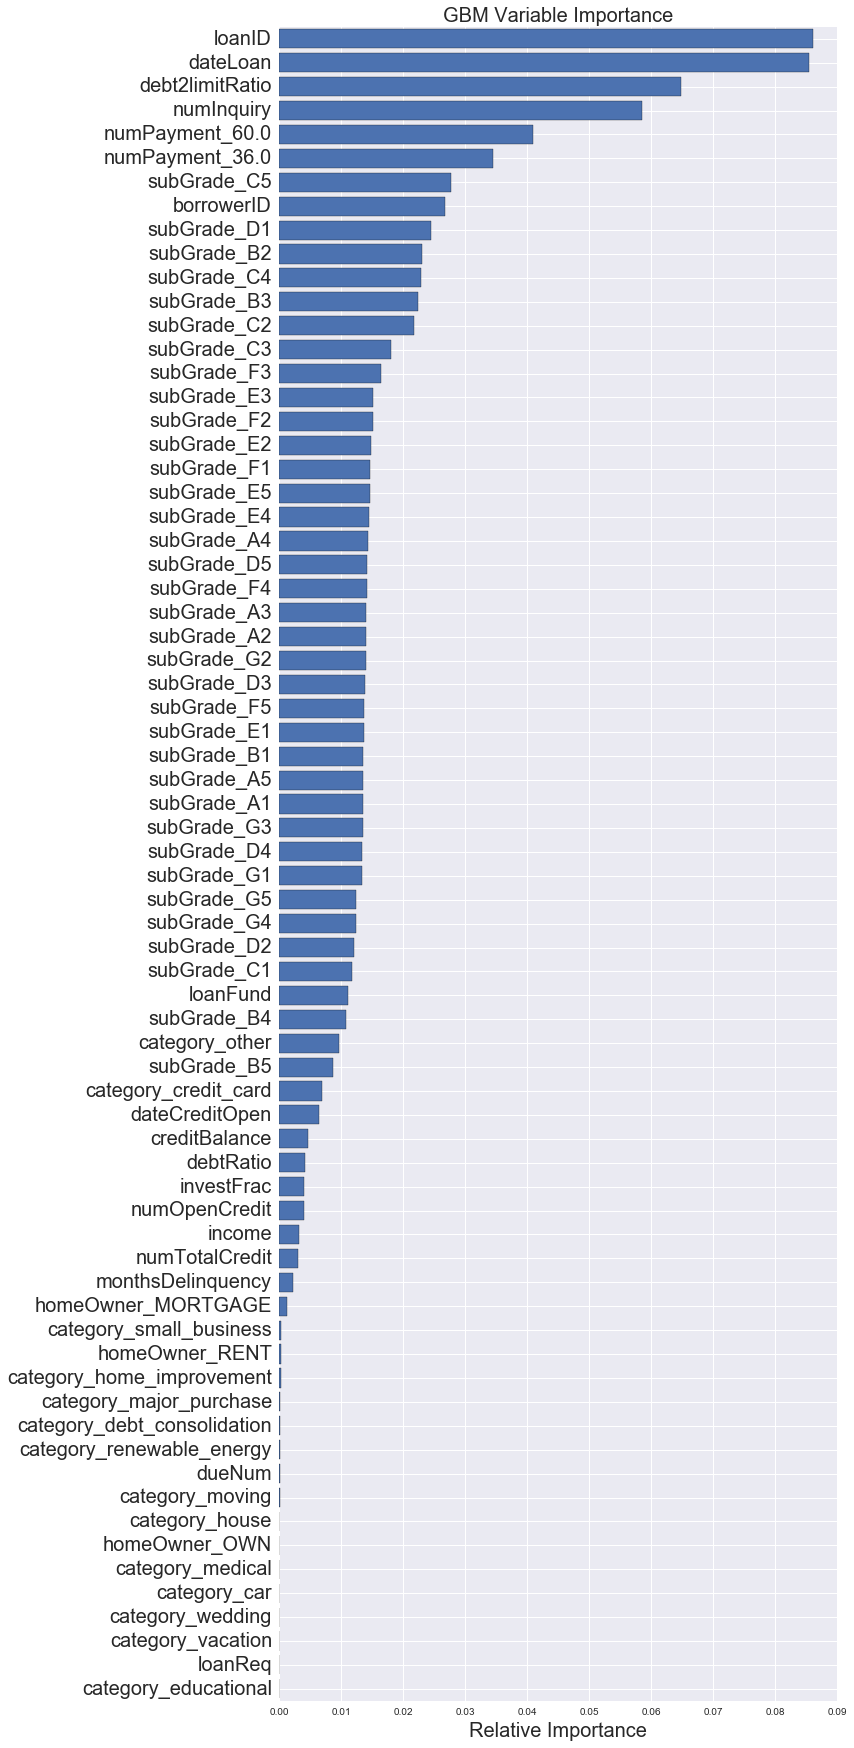

In [20]:
feature_importance = gbr_best.feature_importances_
num=len(gbr_best.feature_importances_)
num_plot=15
# make importances relative to max importance
sorted_idx = np.argsort(feature_importance)[0:num]  ##increase order
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(10,30))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[[sorted_idx]])
plt.xlabel('Relative Importance',fontsize=20)
plt.yticks(fontsize=20)
plt.title('GBM Variable Importance',fontsize=20)
plt.show()

fig.set_dpi(1240)
fig.savefig('feature_importance_GBR_morefeature.png', transparent=True, bbox_inches='tight', pad_inches=0)

###### gridsearch

In [ ]:
max_depth_values = [3,4,5,6,7]
learning_rate_values = [0.15,0.2,0.25]
subsample_values = [0.8,0.9,1]
min_samples_split_values =[2,4]
params = {'max_depth' : max_depth_values, 'learning_rate': learning_rate_values, 
          'subsample': subsample_values, 'min_samples_split': min_samples_split_values}
grid = GridSearchCV(GradientBoostingRegressor(n_estimators=300), params)
grid.fit(x_train,y_train)
scores_test=grid.score(x_test,y_test)
scores_train=grid.score(x_train,y_train)
print ('done')

In [ ]:
print grid.grid_scores_
print grid.score(x_test,y_test)

## XGBOOST

In [21]:
import xgboost as xgb
import sklearn.cross_validation as cv
import scipy as sp

In [22]:
param = {'objective': 'reg:linear',
              'eta': 0.12,
              'eval_metric':'rmse',
              'subsample': 0.7,
              'max_depth': 7,
              'min_child_weight': 2,
              'colsample_bytree': 0.5,
              'gamma': 5,
              'silent': 1
              }
folds = 5 
num_round = 280

In [23]:
    xgmat = xgb.DMatrix(train_data_new, label=target)
    watchlist =[(xgmat, 'train')]
    
    bst_best_model= xgb.train(param, xgmat, num_round, watchlist)
    print('model fit done')
#     save out model
    bst_best_model.save_model('best_xgb.model')
    xgmat_test = xgb.DMatrix(x_test)
    pred = bst_best_model.predict(xgmat)

[0]	train-rmse:12.7725
[1]	train-rmse:11.3317
[2]	train-rmse:10.0727
[3]	train-rmse:8.97146
[4]	train-rmse:7.98721
[5]	train-rmse:7.13318
[6]	train-rmse:6.40171
[7]	train-rmse:5.75766
[8]	train-rmse:5.20633
[9]	train-rmse:4.72389
[10]	train-rmse:4.29457
[11]	train-rmse:3.92739
[12]	train-rmse:3.60063
[13]	train-rmse:3.32445
[14]	train-rmse:3.09142
[15]	train-rmse:2.88538
[16]	train-rmse:2.71059
[17]	train-rmse:2.55787
[18]	train-rmse:2.41378
[19]	train-rmse:2.29189
[20]	train-rmse:2.17968
[21]	train-rmse:2.07615
[22]	train-rmse:1.99379
[23]	train-rmse:1.92031
[24]	train-rmse:1.84777
[25]	train-rmse:1.78703
[26]	train-rmse:1.72756
[27]	train-rmse:1.67446
[28]	train-rmse:1.62478
[29]	train-rmse:1.58404
[30]	train-rmse:1.53572
[31]	train-rmse:1.49372
[32]	train-rmse:1.45787
[33]	train-rmse:1.41754
[34]	train-rmse:1.38137
[35]	train-rmse:1.34692
[36]	train-rmse:1.31883
[37]	train-rmse:1.28134
[38]	train-rmse:1.25459
[39]	train-rmse:1.22091
[40]	train-rmse:1.19318
[41]	train-rmse:1.16813
[4

In [24]:
y_xgb=bst_best_model.predict(xgmat)
print "RMSE of train",
print rmse(y_xgb,target)
print "R2 of train",
print r_squared(y_xgb,target)

RMSE of train 0.180832876742
R2 of train 0.998304545899


In [30]:
feature_train=train_data_new.columns
test_data=test_data[feature_train]

In [31]:
from sklearn.externals import joblib
joblib.dump(bst_best_model, 'xgb_best_model.pkl') 
xgmat_holdout = xgb.DMatrix(test_data)
y_test_xgb_out=bst_best_model.predict(xgmat_holdout)
with open('FrankWang_XGB.csv','a') as f:
    for (i,z) in enumerate(y_test_xgb_out):
        f.write('{}%'.format(z))
        f.write('\n')
f.close()

(array([      0.,   50000.,  100000.,  150000.,  200000.,  250000.,  300000.]),
 <a list of 7 Text xticklabel objects>)

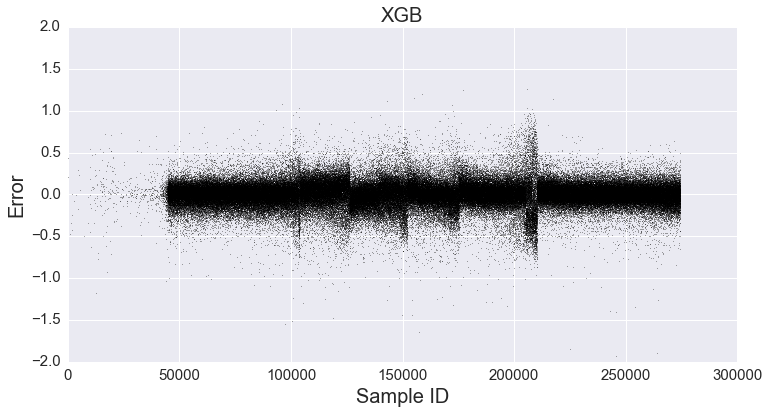

In [71]:
fig=plt.figure()
plt.plot(y_xgb-target,'k.',markersize=1)
plt.ylim([-2,2])
fig.set_size_inches(12,6)
plt.xlabel('Sample ID',fontsize=20)
plt.ylabel('Error',fontsize=20)
plt.title('XGB',fontsize=20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

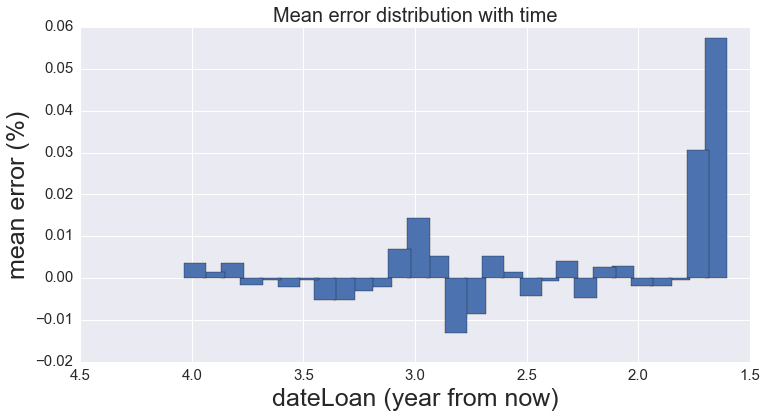

In [57]:
test_all=1.0*train_data_new
test_all['rmse']=y_all_gbr-target
StateGroup=test_all.groupby(['dateLoan']).mean()
my_xticks = StateGroup.index
x= np.arange(len(my_xticks))
x2=x+0.5
fig=plt.figure()
plt.bar(StateGroup['rmse'].keys(),StateGroup['rmse'].values,0.1)
plt.gca().invert_xaxis()
#plt.xticks(x, my_xticks,fontsize = 15,rotation='vertical')
#plt.xticks(x2, my_xticks,fontsize = 8,rotation='horizontal')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('dateLoan (year from now)',fontsize=25)
plt.ylabel('mean error (%)',fontsize=25)
fig.set_size_inches(12,6) 
plt.title('Mean error distribution with time',fontsize=20)
dump=['dateLoan','rmse']
temp=test_all[dump]
temp.to_csv('test_xgb_rmse.csv',sep=' ')

###### grid search

In [107]:
param = {'objective': 'reg:linear',
              'eta': 0.12,
              'eval_metric':'rmse',
              'subsample': 0.7,
              'max_depth': 7,
              'min_child_weight': 2,
              'colsample_bytree': 0.5,
              'gamma': 5,
              'silent': 1
              }
folds = 5 
num_round = 180

In [ ]:
    f=open("summary_bst_scan.txt","a")
    f.write('tuning parameters=')
    f.write('\n')
    for key, values in param.items():
        f.write('param {}={}'.format(key,values))
        f.write('\n')
    f.write('nfolds=%f' %(folds))
    f.write('\n')
    f.write('num_round=%f' %(num_round))
    f.write('\n')
    f.close()
    max_depth_values=[7,8]
    min_child_weight_values=[2,3,4]
    max_depth_values=[7]
    min_child_weight_values=[2]
    
#     for x in max_depth_values:
#         for y in min_child_weight_values:
#             f=open("summary_bst_scan.txt","a")
#             f.write('\n')
#             f.write('-------------')
#             f.write('\n')
#             param['max_depth']=x
#             param['min_child_weight']=y
#             f.write('param {}={}'.format('max_depth',x))
#             f.write('\n')
#             f.write('param {}={}'.format('mini_child_weight',y))
#             f.write('\n')
#             f.write('--------------')
#             f.write('\n')
#             f.close()
#     gamma_vlaues=[10,100]
#     for x in gamma_vlaues:
#             f=open("summary_bst_scan.txt","a")
#             f.write('\n')
#             f.write('-------------')
#             f.write('\n')
#             param['gamma']=x
#             f.write('param {}={}'.format('gamma',x))
#             f.write('\n')
#             f.write('--------------')
#             f.write('\n')
#             f.close()
#     subsample_values=[0.6,0.8,0.9,1]
#     colsample_bytree_values=[0.6,0.8,0.9,1]
# #     subsample_values=[1]
# #     colsample_bytree_values=[0.5,0.7]
#     for x in subsample_values:
#         for y in colsample_bytree_values:
#             f=open("summary_bst_scan.txt","a")
#             f.write('\n')
#             f.write('-------------')
#             f.write('\n')
#             param['subsample']=x
#             param['colsample_bytree']=y
#             f.write('param {}={}'.format('subsample',x))
#             f.write('\n')
#             f.write('param {}={}'.format('colsample_bytree',y))
#             f.write('\n')
#             f.write('--------------')
#             f.write('\n')
#             f.close()
#     num_round_values =[150,180,200,250]
#     num_round_values =[100,120,130,140]
    num_round_values =[260,300,340]
    for x in num_round_values:
            f=open("summary_bst_scan.txt","a")
            f.write('\n')
            f.write('-------------')
            f.write('\n')
            num_round =x
            f.write('num_round={}'.format(x))
            f.write('\n')
            f.write('--------------')
            f.write('\n')
            f.close()

            estimate_performance_xgboost(train_data_new, target.values, param, num_round, folds)

rmse=8.79256926315
rmse=4.70482602004
rmse=4.48771712736
rmse=4.31484968587
rmse=5.31284726385
------------------------------------------------------
mean rmse =5.52256187205 with std=1.66943660249
rmse=8.48163799976
rmse=4.72290628929
rmse=4.49904147469
rmse=4.33025528452

In [109]:
def estimate_performance_xgboost(X,labels,param, num_round, folds):
    '''
    Cross validation for XGBoost performance
    '''
    f=open("summary_bst_scan.txt","a")
    start = np.random.random_integers(1000) #time.time()
    # Cross validate
    kf = cv.KFold(labels.size, n_folds=folds, random_state=start)
    # Dictionary to store all the AMSs
    all_rmse = []
    for train_indices, test_indices in kf:
        X_train, X_test = X.loc[train_indices], X.loc[test_indices]
        y_train, y_test = labels[train_indices], labels[test_indices]
        xgmat = xgb.DMatrix(X_train, label=y_train)
        plst = param.items()#+[('eval_metric', 'ams@0.15')]

        watchlist = []#[(xgmat, 'train')]
        bst = xgb.train(plst, xgmat, num_round, watchlist)

        xgmat_test = xgb.DMatrix(X_test)
        y_out = bst.predict(xgmat_test)
        num=y_test.shape[0]
        y_test=np.reshape(y_test,num)
        rmse_score=rmse(y_out,y_test)
        print('rmse={}'.format(rmse_score))
        f.write('rmse={}'.format(rmse_score))
        f.write('\n')
        all_rmse.append(rmse_score)
    print ("------------------------------------------------------")
    print ("mean rmse ={} with std={}".format(sp.mean(all_rmse),sp.std(all_rmse)))
    f.write("mean rmse ={} with std={}".format(sp.mean(all_rmse),sp.std(all_rmse)))
    f.write('\n')   
    f.close()

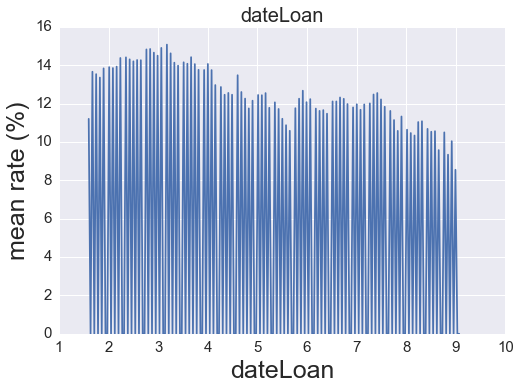

In [62]:
corr_rate_plot('dateLoan',nbins=200)

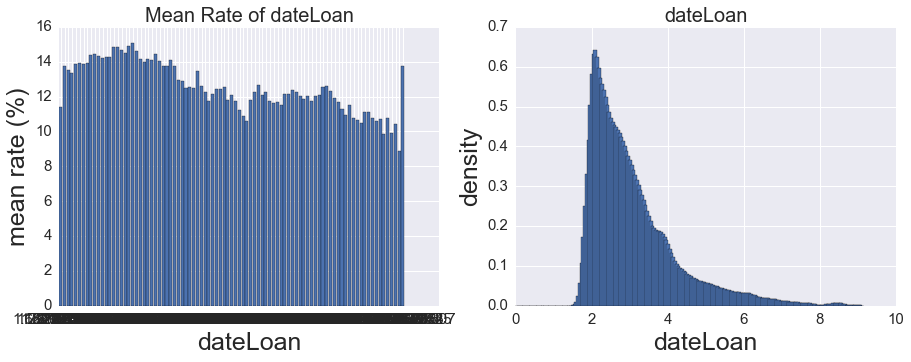

In [68]:
group_plot('dateLoan')